# Como o desmatamento do Brasil influência o desmatamento na América do Sul ?

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


forest = pd.read_csv('./csv/forest.csv', sep = ',')
forest_area = pd.read_csv('./csv/forest_area.csv', sep = ',')
brazil_loss = pd.read_csv('./csv/brazil_loss.csv', sep = ',')
soybean_use = pd.read_csv('./csv/soybean_use.csv', sep = ',')
vegetable_oil = pd.read_csv('./csv/vegetable_oil.csv', sep = ',')
pd.set_option("max_rows", 100)
def tamanhoPlot(x, y):
    fig_dims = (x, y)
    fig, ax = plt.subplots(figsize=fig_dims)
    return ax

In [69]:
def filtroAmericaDoSul(df):
    data = df[(df.Código.notna()) &((df['Entidade'] == 'Brazil')#Seleção de alguns países
                    https://www.youtube.com/watch?v=r4l73teyAJY                    |(df['Entidade'] == 'Argentina') 
                                        |(df['Entidade'] == 'Bolivia')
                                        |(df['Entidade'] == 'Chile')
                                        |(df['Entidade'] == 'Guyane')
                                        |(df['Entidade'] == 'Colombia')
                                        |(df['Entidade'] == 'Ecuador')
                                        |(df['Entidade'] == 'Paraguay')
                                        |(df['Entidade'] == 'Suriname')
                                        |(df['Entidade'] == 'Uruguay')
                                        |(df['Entidade'] == 'Venezuela')
                                        |(df['Entidade'] == 'French_Guiana')
                                        |(df['Entidade'] == 'Falkland Islands')
                                        |(df['Entidade'] == 'South Georgia and South Sandwich Islands'))]
    data.dropna(inplace=True)
    return data

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Ano', ylabel='Conversão_líquida_de_floresta'>

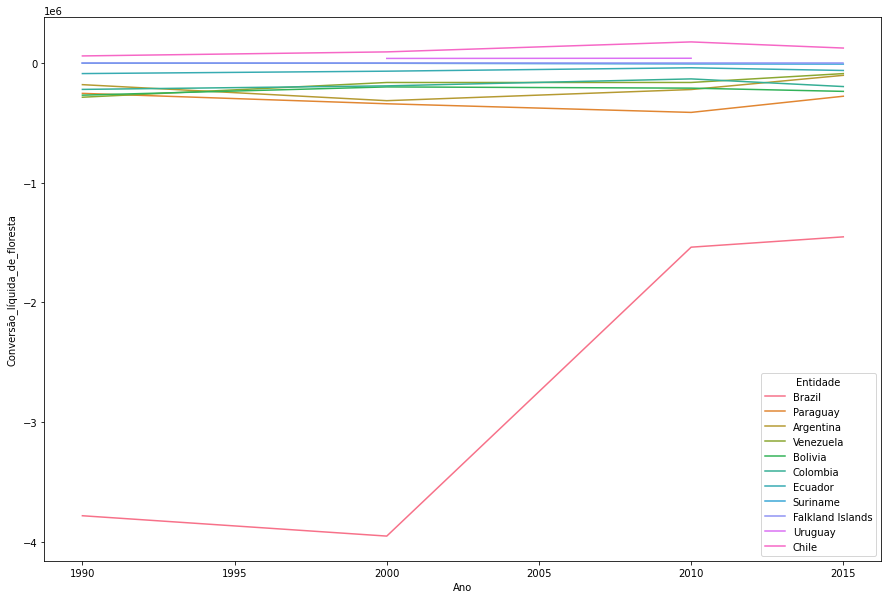

In [70]:
data = filtroAmericaDoSul(forest)
data = data.sort_values(['Conversão_líquida_de_floresta'])
ls = pd.melt(data, id_vars=['Entidade', 'Código', 'Ano'], value_vars=data.columns, var_name='Conversão', value_name='Conversão de florestas em hectares')
ax = tamanhoPlot(15, 10)
sns.lineplot(x='Ano', y='Conversão_líquida_de_floresta', data=data, hue='Entidade', ax=ax)

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Ano', ylabel='Área_de_Floresta'>

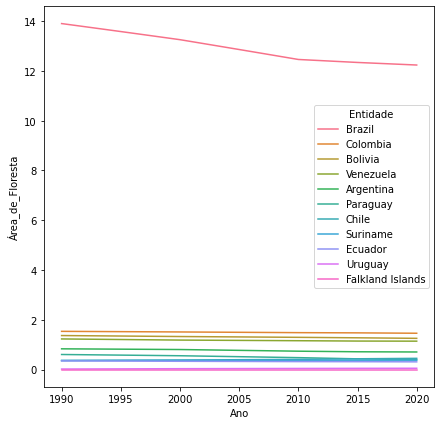

In [71]:
data = filtroAmericaDoSul(forest_area)
data.sort_values('Área_de_Floresta', ascending=False, inplace=True)
ax = tamanhoPlot(7, 7)
sns.lineplot(x='Ano', y='Área_de_Floresta', data=data, hue='Entidade', ax=ax)

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Ano', ylabel='Produção'>

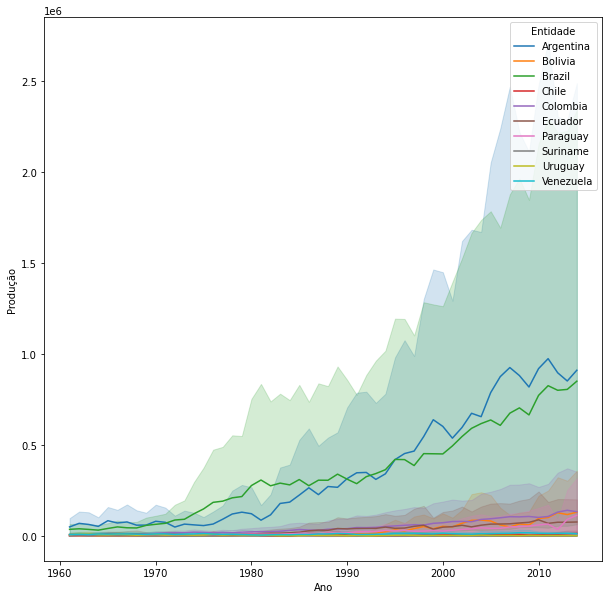

In [72]:
data = filtroAmericaDoSul(vegetable_oil)
sns.lineplot(x='Ano', y='Produção_Óleo', data=data, hue='Entidade', ax=tamanhoPlot(10,10))

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Ano', ylabel='Toneladas'>

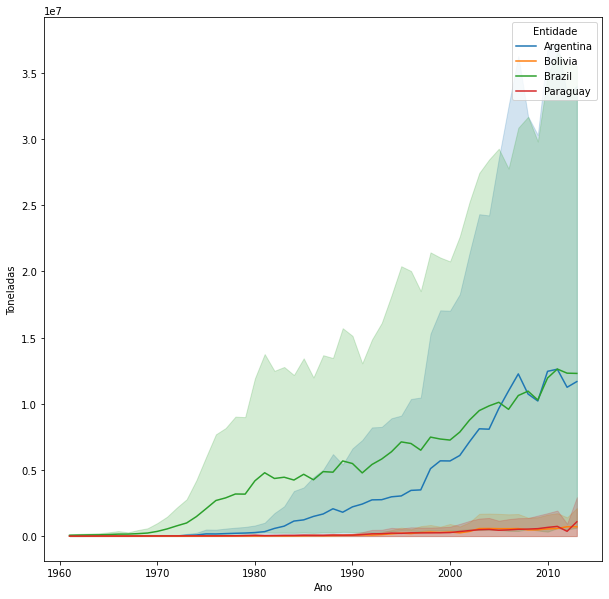

In [73]:
data = filtroAmericaDoSul(soybean_use)
ls = pd.melt(data, id_vars=['Entidade', 'Ano', 'Código'], value_vars=data.columns, value_name='Toneladas', var_name='Uso da soja')
entidade = data.groupby(['Entidade'])
sns.lineplot(x='Ano', y='Toneladas', data=ls, hue ='Entidade', ax=tamanhoPlot(10,10))
